# Exploratory Data Analysis on HS student performance 

The purpose of this notebook is to do some exploratory data analysis (EDA) on a dataset of HS student performance in order to practice EDA using python. The data set is from https://www.kaggle.com/spscientist/students-performance-in-exams

In [26]:
#Import packages and data
import pandas as pd 
from plotnine import *
import numpy as np

df = pd.read_csv('StudentsPerformance.csv')

Let's look at the data, which has been read into the dataframe df:

In [18]:
df.head() #shows us the first 5 lines of the df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
info = df.describe()
print info #this gives us some summary statistics on the dataset. It also tells us there are 1,000 rows. 

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


Let's start looking for some trends. Is there any trend between data and test scores? 

In [20]:
dfgender = df.groupby(['gender'])
dfgender.describe()

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ...                writing score             \
               count       mean  ...     75%    max         count       mean   
gender                           ...                                           
female         518.0  72.608108  ...    83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...    75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0  64.0  73.75  100.0  

[2 rows x 24 columns]

It looks like male students had a higher average math score while female students had higher average writing and reading scores.

In [21]:
dfTestPrepGender = df.groupby(['gender', 'test preparation course'])
dfTestPrepGender.describe()

math score                                     \
                                    count       mean        std   min    25%   
gender test preparation course                                                 
female completed                    184.0  67.195652  14.244346  23.0  58.75   
       none                         334.0  61.670659  15.818013   0.0  52.00   
male   completed                    174.0  72.339080  14.221817  39.0  62.00   
       none                         308.0  66.688312  14.049016  27.0  57.75   

                                                  reading score             \
                                 50%   75%    max         count       mean   
gender test preparation course                                               
female completed                67.0  76.0   99.0         184.0  77.375000   
       none                     62.0  73.0  100.0         334.0  69.982036   
male   completed                73.0  82.0  100.0         174.0  70.212644   
       none                     67.0  76.0   97.0         308.0  62.795455   

                                ...                writing score             \
                                ...     75%    max         count       mean   
gender test preparation course  ...                                           
female completed                ...    86.0  100.0         184.0  78.793478   
       none                     ...    80.0  100.0         334.0  68.982036   
male   completed                ...    81.0  100.0         174.0  69.793103   
       none                     ...    73.0   96.0         308.0  59.649351   

                                                                            
                                      std   min    25%   50%    75%    max  
gender test preparation course                                              
female completed                12.240788  36.0  72.00  79.0  87.25  100.0  
       none                     15.016497  10.0  60.00  70.0  79.00  100.0  
male   completed                12.992339  38.0  60.25  70.0  79.00  100.0  
       none                     13.405737  15.0  51.00  60.0  69.00   92.0  

[4 rows x 24 columns]

For both male and female students, those that completed a test prep course scored higher in math, reading, and writing. 

In [84]:
dfLunchParental = df.groupby(['parental level of education', 'lunch'])
dfLunchParental.describe()

math score                        \
                                              count       mean        std   
parental level of education lunch                                           
associate's degree          free/reduced       77.0  62.610390  14.696183   
                            standard          145.0  70.682759  14.620051   
bachelor's degree           free/reduced       44.0  63.000000  15.003875   
                            standard           74.0  73.189189  13.640869   
high school                 free/reduced       70.0  54.514286  15.147337   
                            standard          126.0  66.373016  12.349403   
master's degree             free/reduced       24.0  61.166667  14.384976   
                            standard           35.0  75.628571  12.813333   
some college                free/reduced       79.0  60.126582  13.510079   
                            standard          147.0  70.891156  13.319637   
some high school            free/reduced       61.0  53.934426  16.095412   
                            standard          118.0  68.440678  13.446025   

                                                                           \
                                           min    25%   50%    75%    max   
parental level of education lunch                                           
associate's degree          free/reduced  26.0  53.00  61.0  75.00  100.0   
                            standard      39.0  59.00  71.0  82.00  100.0   
bachelor's degree           free/reduced  29.0  50.75  62.5  74.00   93.0   
                            standard      37.0  65.00  71.0  82.75  100.0   
high school                 free/reduced   8.0  42.50  57.0  66.00   86.0   
                            standard      29.0  58.00  68.0  74.00   99.0   
master's degree             free/reduced  40.0  49.75  59.5  74.00   85.0   
                            standard      50.0  68.00  78.0  86.00   95.0   
some college                free/reduced  22.0  51.00  61.0  69.00   93.0   
                            standard      19.0  62.00  70.0  79.50  100.0   
some high school            free/reduced   0.0  45.00  55.0  65.00   80.0   
                            standard      30.0  61.00  68.5  77.00   97.0   

                                         reading score             ...    \
                                                 count       mean  ...     
parental level of education lunch                                  ...     
associate's degree          free/reduced          77.0  67.649351  ...     
                            standard             145.0  72.668966  ...     
bachelor's degree           free/reduced          44.0  68.931818  ...     
                            standard              74.0  75.418919  ...     
high school                 free/reduced          70.0  60.214286  ...     
                            standard             126.0  67.198413  ...     
master's degree             free/reduced          24.0  70.291667  ...     
                            standard              35.0  78.857143  ...     
some college                free/reduced          79.0  65.075949  ...     
                            standard             147.0  71.816327  ...     
some high school            free/reduced          61.0  60.114754  ...     
                            standard             118.0  70.466102  ...     

                                                       writing score  \
                                            75%    max         count   
parental level of education lunch                                      
associate's degree          free/reduced  76.00  100.0          77.0   
                            standard      83.00  100.0         145.0   
bachelor's degree           free/reduced  78.25  100.0          44.0   
                            standard      84.00  100.0          74.0   
high school                 free/reduced  72.00   92.0          70.0   
            

## How many students passed the math exam? 
Let's set a passing score at 60.

In [73]:
test_pass = 60
df['math_pass_status'] = np.where(df['math score']< test_pass, 'F', 'P')
df.math_pass_status.value_counts()

P    677
F    323
Name: math_pass_status, dtype: int64

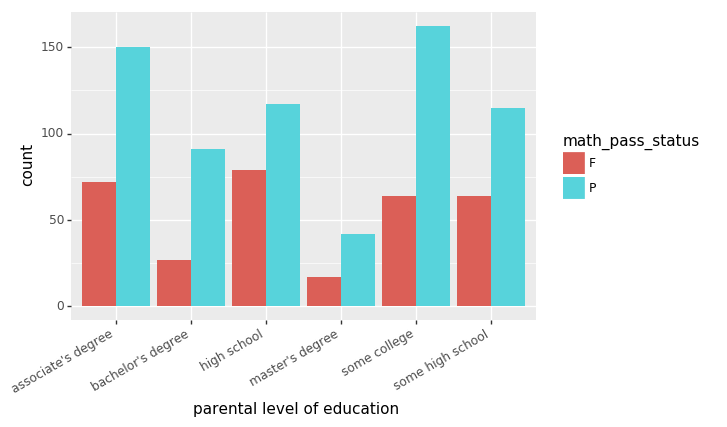

<ggplot: (8779568197381)>


In [69]:
m = (ggplot(df) + aes(x='parental level of education', fill = 'math_pass_status')+ theme(axis_text_x=element_text(angle=30, hjust=1))+
        geom_bar(position='dodge'))
print m

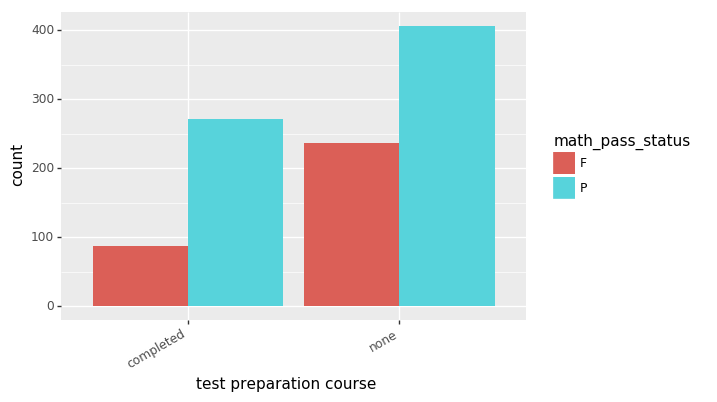

<ggplot: (8779568357249)>


In [71]:
m2 = (ggplot(df) + aes(x='test preparation course', fill = 'math_pass_status')+ theme(axis_text_x=element_text(angle=30, hjust=1))+
        geom_bar(position='dodge'))
print m2

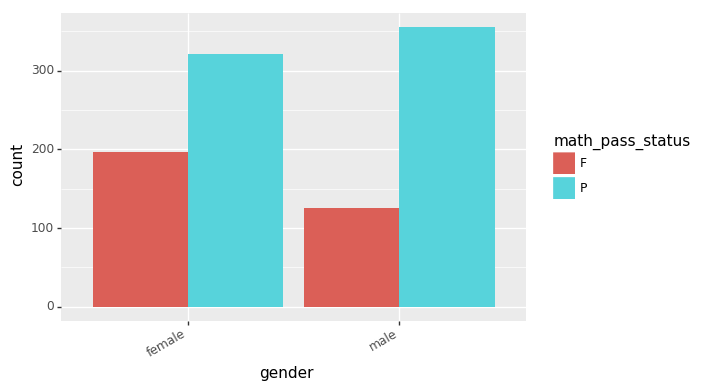

<ggplot: (8779568088265)>


In [85]:
m3 = (ggplot(df) + aes(x='gender', fill = 'math_pass_status')+ theme(axis_text_x=element_text(angle=30, hjust=1))+
        geom_bar(position='dodge'))
print m3

## How many students passed the writing exam?

In [76]:
df['writing_pass_status'] = np.where(df['writing score']< test_pass, 'F', 'P')
df.writing_pass_status.value_counts()

P    719
F    281
Name: writing_pass_status, dtype: int64

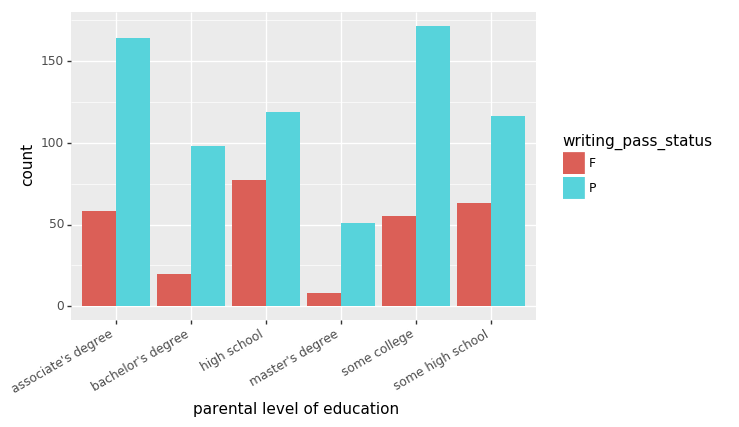

<ggplot: (8779568451661)>


In [77]:
w = (ggplot(df) + aes(x='parental level of education', fill = 'writing_pass_status')+ theme(axis_text_x=element_text(angle=30, hjust=1))+
        geom_bar(position='dodge'))
print w

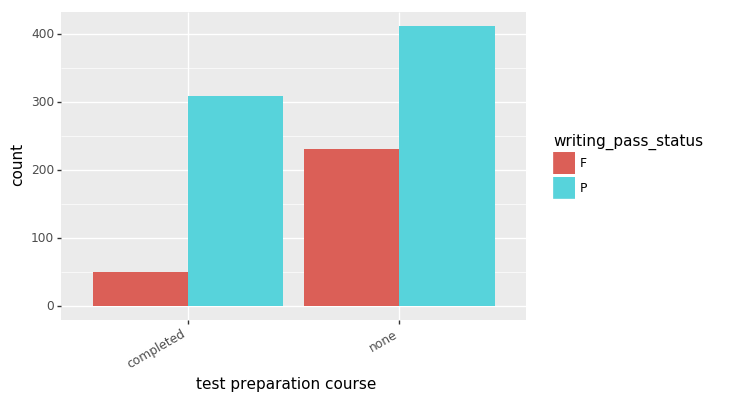

<ggplot: (8779568268605)>


In [78]:
w2 = (ggplot(df) + aes(x='test preparation course', fill = 'writing_pass_status')+ theme(axis_text_x=element_text(angle=30, hjust=1))+
        geom_bar(position='dodge'))
print w2

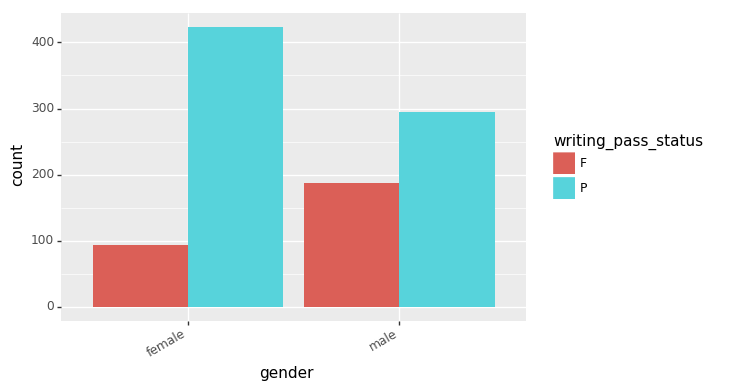

<ggplot: (8779568172293)>


In [86]:
w3 = (ggplot(df) + aes(x='gender', fill = 'writing_pass_status')+ theme(axis_text_x=element_text(angle=30, hjust=1))+
        geom_bar(position='dodge'))
print w3

In [80]:
df['reading_pass_status'] = np.where(df['reading score']< test_pass, 'F', 'P')
df.reading_pass_status.value_counts()

P    746
F    254
Name: reading_pass_status, dtype: int64

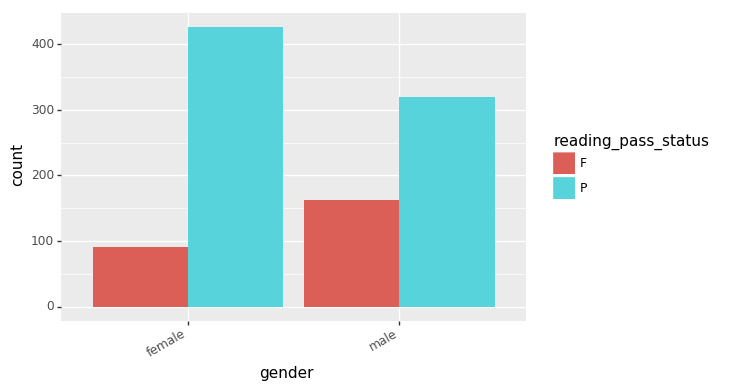

<ggplot: (8779568629857)>


In [87]:
r3 = (ggplot(df) + aes(x='gender', fill = 'reading_pass_status')+ theme(axis_text_x=element_text(angle=30, hjust=1))+
        geom_bar(position='dodge'))
print r3

## How many students passed all three exams?

In [82]:
df['overall_pass_status'] = df.apply(lambda x : 'F' if x['math_pass_status'] == 'F' or 
                                    x['reading_pass_status'] == 'F' or x['writing_pass_status'] == 'F' else 'P', axis =1)

df.overall_pass_status.value_counts()

P    603
F    397
Name: overall_pass_status, dtype: int64

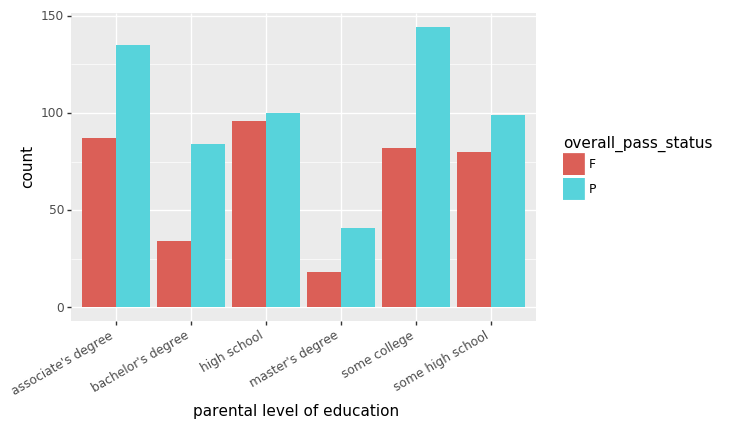

<ggplot: (8779568374045)>


In [83]:
overall = (ggplot(df) + aes(x='parental level of education', fill = 'overall_pass_status')+ theme(axis_text_x=element_text(angle=30, hjust=1))+
        geom_bar(position='dodge'))
print overall

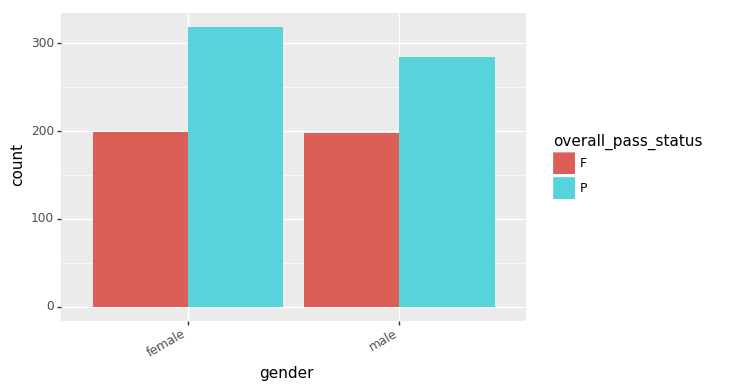

<ggplot: (8779568212921)>


In [88]:
overall = (ggplot(df) + aes(x='gender', fill = 'overall_pass_status')+ theme(axis_text_x=element_text(angle=30, hjust=1))+
        geom_bar(position='dodge'))
print overall

In [90]:
o = df.groupby(['gender', 'overall_pass_status'])
o.describe()

math score                                          \
                                count       mean        std   min   25%   50%   
gender overall_pass_status                                                      
female F                        199.0  48.396985  10.126881   0.0  44.0  51.0   
       P                        319.0  73.137931   9.508674  60.0  65.0  71.0   
male   F                        198.0  55.838384   9.361013  27.0  50.0  57.0   
       P                        284.0  77.714789   9.592381  60.0  70.0  77.0   

                                        reading score             ...          \
                             75%    max         count       mean  ...     75%   
gender overall_pass_status                                        ...           
female F                    56.0   61.0         199.0  59.497487  ...    66.0   
       P                    79.0  100.0         319.0  80.786834  ...    87.5   
male   F                    62.0   75.0         198.0  52.308081  ...    58.0   
       P                    85.0  100.0         284.0  74.651408  ...    81.0   

                                  writing score                              \
                              max         count       mean        std   min   
gender overall_pass_status                                                    
female F                     85.0         199.0  58.964824  11.788274  10.0   
       P                    100.0         319.0  80.890282   9.299888  61.0   
male   F                     72.0         198.0  49.727273   8.135675  15.0   
       P                    100.0         284.0  72.781690   8.566610  60.0   

                                                     
                             25%   50%   75%    max  
gender overall_pass_status                           
female F                    53.5  60.0  67.0   80.0  
       P                    74.0  80.0  87.5  100.0  
male   F                    45.0  51.0  55.0   66.0  
       P                    66.0  72.0  78.0  100.0  

[4 rows x 24 columns]

## Some conclusions:
- male students averaged higher math scores while female students averaged higher reading and writing scores
- students that took a test prep course had higher average scores on math, reading, and writing, compared to students that did not take a test prep course


## Future considerations (note to self):
- gender + ethnicities
- grades broken down into percentiles (gender, parental level of education)
- parental level of education vs. lunch
- parental level of education vs. test preparation course 
- build models 
- prediction whether student will pass or fail?
